In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.optimize as opt
np.random.seed(seed=233423)

In [2]:
def RhoSq(y_hat, y_true):
    y_mean = np.mean(y_true)
    return(1 - sum((y_hat-y_true)**2)/sum((y_mean-y_true)**2)  )

In [3]:
Data = pd.read_csv("Seshat Data.csv")

In [4]:
Data

,NGA,PolID,Time,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
0,Big Island Hawaii,Hawaii1,1000,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
1,Big Island Hawaii,Hawaii1,1100,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
2,Big Island Hawaii,Hawaii2,1200,3.750606,3.337475,3.363416,1.060611,0.090909,0.090909,0.150000,0.000000,1.8,0.222845,0
3,Big Island Hawaii,Hawaii2,1300,4.065673,3.337475,3.429545,0.943410,0.090909,0.090909,0.150000,0.000000,1.8,0.228982,0
4,Big Island Hawaii,Hawaii2,1400,4.192464,3.337475,3.584463,1.993130,0.090909,0.181818,0.150000,0.000000,1.8,0.258405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Yemeni Coastal Plain,YeRasul,1400,5.881658,6.536808,4.698970,4.500000,0.977778,0.950000,1.000000,1.000000,4.5,0.801720,1
860,Yemeni Coastal Plain,YeTahir,1500,5.454290,5.762184,5.171692,4.500000,0.888889,0.966667,1.000000,1.000000,5.0,0.797062,1
861,Yemeni Coastal Plain,TrOttm3,1600,7.447158,6.684486,5.819190,8.036426,0.990909,0.916667,1.000000,1.000000,5.0,0.958307,1
862,Yemeni Coastal Plain,YeQasmi,1700,5.418268,5.553020,3.661252,3.000000,0.572727,0.272727,0.833333,0.814286,5.0,0.568928,1


## SPC1 Break Point for RelTime


In [5]:
np.median(Data["SPC1"])

0.356081775

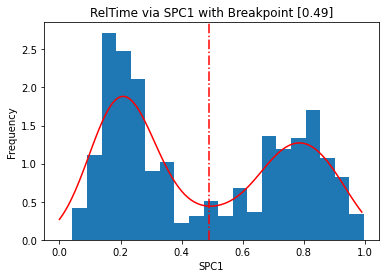

In [6]:
plt.hist(Data["SPC1"], bins = 20, density = True)

x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["SPC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
plt.plot(x, KDE, c="red")
plt.axvline(xmin, linestyle="-.",c="red", )
plt.title("RelTime via SPC1 with Breakpoint "+str(np.round(xmin,2)))
plt.xlabel("SPC1")
plt.ylabel("Frequency")
plt.show()

SPC_Break = xmin

### IDEA

If this is too restrictive, maybe choose the first maximum around 0.2 as the "Time Zero". Aka the first emergence of medium-to-large structure.

PolPop


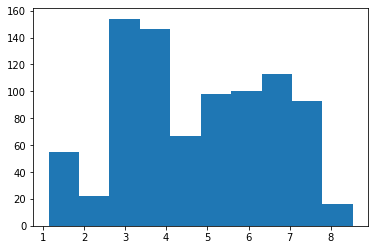

PolTerr


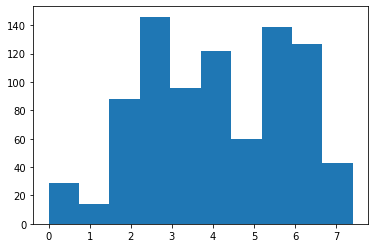

CapPop


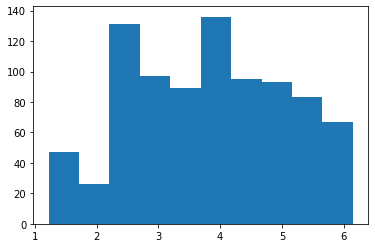

levels


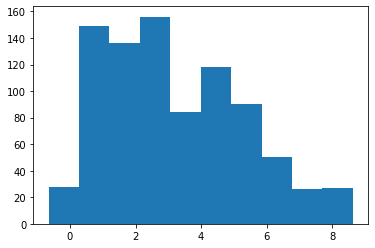

government


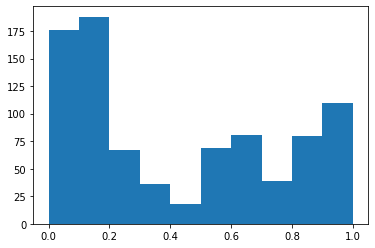

infrastr


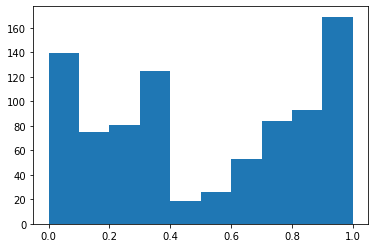

writing


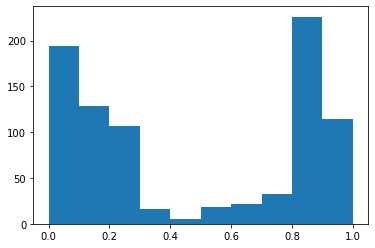

texts


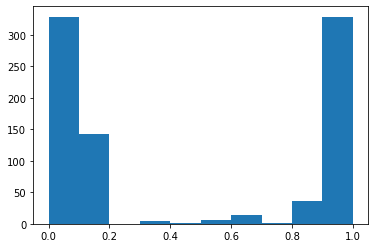

money


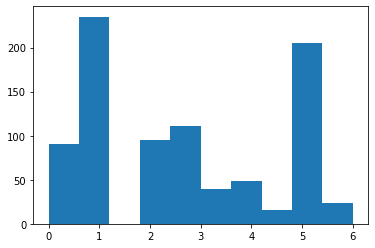

SPC1


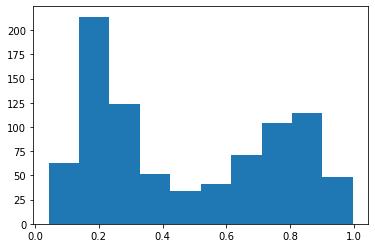

In [7]:
for i in range(3,13):
    print(Data.columns[i])
    plt.hist(Data[Data.columns[i]])
    #plt.set_title(Data.columns[i])
    plt.show()

In [8]:
# Next, we define a relative time scale (RelTime) with 0 at the time when the SPC1 trajectory crosses the 5.3 threshold

In [9]:
NGA = Data["NGA"][0]
print(Data[Data["NGA"] == NGA])

                 NGA    PolID  Time    PolPop   PolTerr    CapPop    levels  \
0  Big Island Hawaii  Hawaii1  1000  3.854914  4.111759  2.282858 -0.653777   
1  Big Island Hawaii  Hawaii1  1100  3.854914  4.111759  2.282858 -0.653777   
2  Big Island Hawaii  Hawaii2  1200  3.750606  3.337475  3.363416  1.060611   
3  Big Island Hawaii  Hawaii2  1300  4.065673  3.337475  3.429545  0.943410   
4  Big Island Hawaii  Hawaii2  1400  4.192464  3.337475  3.584463  1.993130   
5  Big Island Hawaii  Hawaii2  1500  4.599847  3.337475  3.807048  4.564236   
6  Big Island Hawaii  Hawaii2  1600  4.440997  3.337475  2.308375  2.584892   
7  Big Island Hawaii  Hawaii3  1700  5.011752  3.973290  3.442766  3.153204   
8  Big Island Hawaii  USKameh  1800  5.192031  4.226199  4.363033  3.534543   

   government  infrastr   writing  texts  money      SPC1  MG_corr  
0    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
1    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
2 

In [10]:
NGAlist = list(set(Data["NGA"]))
print(len(NGAlist))
LargeNGAs = []
SmallNGAs = []

for NGA in NGAlist:
    Subset = Data[Data["NGA"] == NGA]
    Logical = np.max(Subset["SPC1"]) > SPC_Break # Is this polity large enough to cross the SPC1 threshold?
    print("Is " +NGA+" large enough?",  Logical)
    if Logical:
        LargeNGAs.append(NGA)
    else:
        SmallNGAs.append(NGA)
    #print(Subset)
print(LargeNGAs)

30
Is Finger Lakes large enough? [False]
Is Yemeni Coastal Plain large enough? [ True]
Is North Colombia large enough? [False]
Is Latium large enough? [ True]
Is Upper Egypt large enough? [ True]
Is Lena River Valley large enough? [False]
Is Cuzco large enough? [ True]
Is Kapuasi Basin large enough? [False]
Is Sogdiana large enough? [ True]
Is Ghanaian Coast large enough? [ True]
Is Southern China Hills large enough? [False]
Is Central Java large enough? [ True]
Is Kansai large enough? [ True]
Is Cahokia large enough? [False]
Is Oro PNG large enough? [False]
Is Big Island Hawaii large enough? [False]
Is Niger Inland Delta large enough? [ True]
Is Orkhon Valley large enough? [ True]
Is Paris Basin large enough? [ True]
Is Lowland Andes large enough? [False]
Is Valley of Oaxaca large enough? [False]
Is Kachi Plain large enough? [ True]
Is Konya Plain large enough? [ True]
Is Deccan large enough? [ True]
Is Middle Yellow River Valley large enough? [ True]
Is Garo Hills large enough? [Fals

In [11]:
Seshat_Large = Data[Data["NGA"].isin(LargeNGAs)]
print(Seshat_Large)


                      NGA    PolID  Time    PolPop   PolTerr    CapPop  \
33        Cambodian Basin  KhFunaE   300  6.235249  5.409991  3.301030   
34        Cambodian Basin  KhFunaE   400  6.235249  5.409991  3.301030   
35        Cambodian Basin  KhFunaE   500  6.235249  5.409991  3.301030   
36        Cambodian Basin  KhFunaL   600  5.254599  5.421933  3.301030   
37        Cambodian Basin  KhChenl   700  6.393323  5.725095  4.778151   
..                    ...      ...   ...       ...       ...       ...   
859  Yemeni Coastal Plain  YeRasul  1400  5.881658  6.536808  4.698970   
860  Yemeni Coastal Plain  YeTahir  1500  5.454290  5.762184  5.171692   
861  Yemeni Coastal Plain  TrOttm3  1600  7.447158  6.684486  5.819190   
862  Yemeni Coastal Plain  YeQasmi  1700  5.418268  5.553020  3.661252   
863  Yemeni Coastal Plain  YeQasmi  1800  5.418268  5.553020  3.661252   

       levels  government  infrastr   writing     texts  money      SPC1  \
33   2.666667    0.618182  0.977778

## Now for the RelTime


In [12]:
Data_RT = pd.DataFrame(columns = Seshat_Large.columns)
DF_Tzero = pd.DataFrame(columns = ["NGA", "T0"])

# go through the NGAs
for NGA in list(set(Seshat_Large["NGA"])):
    
    # Subset of this NGA's data
    NGA_dat = Seshat_Large[Seshat_Large["NGA"] == NGA]
    # Calculate this NGA's Time Zero
    NGA_TimeZero =NGA_dat["Time"].loc[NGA_dat["SPC1"]> SPC_Break[0]].iloc[0]
    print(NGA,NGA_TimeZero)
    # Shift the Time Scale
    NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
    
    # And combine it to a new Data Frame
    Data_RT = pd.concat([Data_RT, NGA_dat])
    DF_Tzero = pd.concat([DF_Tzero, pd.DataFrame(data={"NGA": [NGA], "T0": [NGA_TimeZero]})])
    print(NGA_dat[["Time", "SPC1"]])
    print(" ________________________ ")

Niger Inland Delta 1000
     Time      SPC1
490 -1200  0.098110
491 -1100  0.098110
492 -1000  0.098110
493  -900  0.201994
494  -800  0.201994
495  -700  0.201994
496  -600  0.302212
497  -500  0.302212
498  -400  0.302212
499  -300  0.302212
500  -200  0.302212
501  -100  0.378760
502     0  0.552919
503   100  0.707378
504   200  0.707378
505   300  0.718475
506   400  0.720930
507   500  0.767729
508   600  0.816770
509   700  0.816770
510   800  0.751563
 ________________________ 
Orkhon Valley 500
     Time      SPC1
524 -1900  0.315541
525 -1800  0.315541
526 -1700  0.315541
527 -1600  0.315541
528 -1500  0.315541
529 -1400  0.315541
530 -1300  0.315541
531 -1200  0.315541
532 -1100  0.315541
533 -1000  0.315541
534  -900  0.327782
535  -800  0.327782
536  -700  0.459248
537  -600  0.459248
538  -500  0.450334
539  -400  0.430392
540  -300  0.430392
541  -200  0.430236
542  -100  0.430236
543     0  0.520649
544   100  0.600909
545   200  0.596967
546   300  0.644542
547   400  

C:\Users\Tobias\AppData\Local\Temp/ipykernel_1504/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_1504/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_1504/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [13]:
DF_Tzero.set_index("NGA", inplace=True)
DF_Tzero.transpose().to_csv("TimeZero.csv")
DF_Tzero.transpose()

NGA,Niger Inland Delta,Orkhon Valley,Middle Yellow River Valley,Central Java,Paris Basin,Yemeni Coastal Plain,Kachi Plain,Kansai,Konya Plain,Latium,Cambodian Basin,Upper Egypt,Susiana,Deccan,Cuzco,Sogdiana,Ghanaian Coast,Iceland
T0,1000,500,-1800,800,-200,400,-2500,400,-2000,-700,300,-3100,-3700,-300,1400,-500,1800,1300


In [14]:
Data_RT.rename(columns={'Time':'RelTime'}, inplace=True)
Data_RT

,NGA,PolID,RelTime,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
490,Niger Inland Delta,MlJeJe1,-1200,2.470339,0.732024,2.053112,1.000000,0.090909,0.166667,0.166667,0.0125,0.9,0.098110,0
491,Niger Inland Delta,MlJeJe1,-1100,2.470339,0.732024,2.053112,1.000000,0.090909,0.166667,0.166667,0.0125,0.9,0.098110,0
492,Niger Inland Delta,MlJeJe1,-1000,2.470339,0.732024,2.053112,1.000000,0.090909,0.166667,0.166667,0.0125,0.9,0.098110,0
493,Niger Inland Delta,MlJeJe2,-900,3.377552,2.968441,3.162426,1.548512,0.081818,0.158333,0.166667,0.0125,0.9,0.201994,0
494,Niger Inland Delta,MlJeJe2,-800,3.377552,2.968441,3.162426,1.548512,0.081818,0.158333,0.166667,0.0125,0.9,0.201994,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Ghanaian Coast,GhAshnL,0,6.599660,5.796741,4.130334,5.333333,0.454545,0.408333,1.000000,0.3750,3.0,0.623384,1
125,Iceland,IsCommw,-300,4.380242,5.012837,2.399057,2.333333,0.122222,0.000000,0.600000,0.0125,4.0,0.337468,1
126,Iceland,IsCommw,-200,4.491362,5.012837,2.399057,2.666667,0.233333,0.000000,0.800000,0.3625,4.0,0.404175,1
127,Iceland,IsCommw,-100,4.547767,5.012837,2.399057,2.666667,0.233333,0.000000,1.000000,0.9875,4.0,0.473478,1


## Comparison

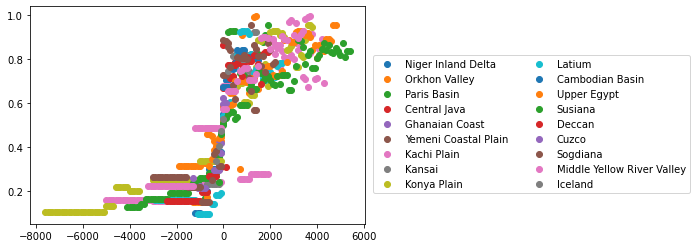

In [15]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.scatter(DF["RelTime"], DF["SPC1"], label=N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

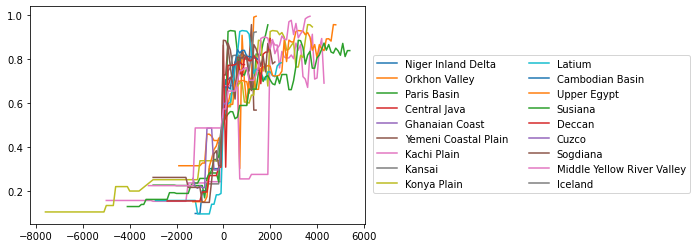

In [16]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"], DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

## Fitting

Fit logistic model to the data set. Then, try cross-valdiation by fitting on some time series and predicting the others.

In [17]:
X, y = Data_RT["RelTime"].to_numpy(), Data_RT["SPC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data

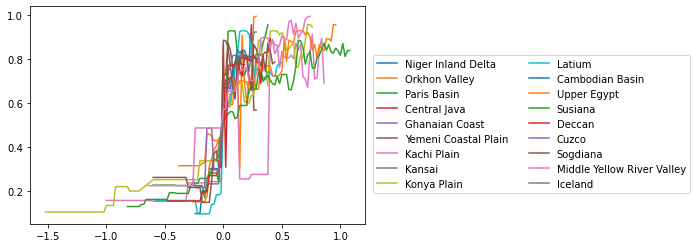

In [18]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

In [19]:
def f(x, a, b, c, d):
    # the logistic function in its most general shape
    return a / (1. + np.exp(-c * (x - d))) + b

The parameter c (or rather 1/c) corresponds to a time scale of the temporal evolution.

In [20]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y)

p0 = np.array((a_, b_, c_, d_))
print(p0)

[ 5.91641013e-01  1.93784867e-01  1.93749266e+01 -1.54321332e-02]


In [21]:
print(a_, b_, c_, d_)
x_show = np.arange(min(X), max(X)+1000/T,100/T) # evaluate the estimated function here
print(min(x_show), max(x_show))
y_hat = f(x_show, a_, b_, c_, d_)

0.5916410130818774 0.1937848671388085 19.37492655640355 -0.015432133231601055
-1.52 1.2600000000000025


In [22]:
print(p0)


[ 5.91641013e-01  1.93784867e-01  1.93749266e+01 -1.54321332e-02]


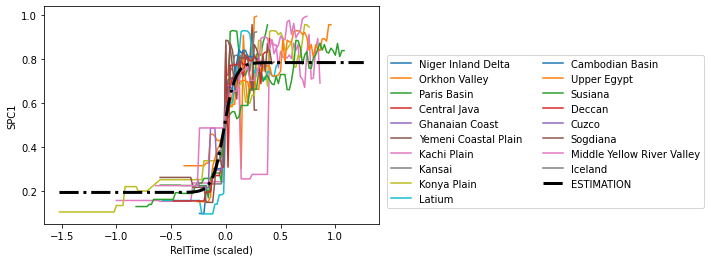

In [23]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.xlabel("RelTime (scaled)")
plt.ylabel("SPC1")
plt.show()

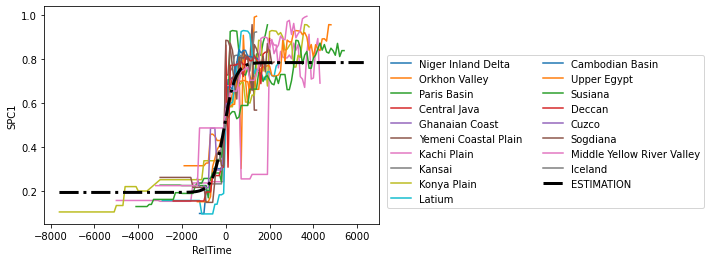

In [24]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.show()

#### Residuals

In [25]:
y_est = f(X,a_, b_, c_, d_)
y_est_Residuals = y_est
y_Residuals = y

In [26]:
RMSE = (np.sum((y_est_Residuals-y_Residuals)**2) / len(y)  )**0.5
print(RMSE)

0.11299071583113561


In [27]:
def RhoSq(y_hat, y_true): # like in Turchin's original PCA paper
    y_mean = np.mean(y_true)
    return(1 - sum((y_hat-y_true)**2)/sum((y_mean-y_true)**2)  )

print("RhoSquared",RhoSq(y_hat = y_Residuals,
           y_true = y_est_Residuals))

RhoSquared 0.8186909044606873


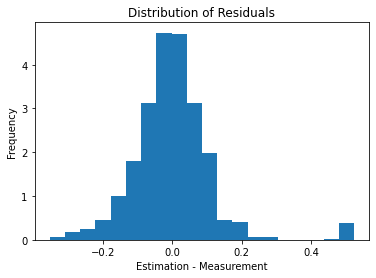

In [28]:
plt.hist(y_est_Residuals-y_Residuals,bins = 20, density = True)
plt.title("Distribution of Residuals")
plt.xlabel("Estimation - Measurement")
plt.ylabel("Frequency")
plt.show()

['Cambodian Basin',
 'Central Java',
 'Cuzco',
 'Deccan',
 'Ghanaian Coast',
 'Iceland',
 'Kachi Plain',
 'Kansai',
 'Konya Plain',
 'Latium',
 'Middle Yellow River Valley',
 'Niger Inland Delta',
 'Orkhon Valley',
 'Paris Basin',
 'Sogdiana',
 'Susiana',
 'Upper Egypt',
 'Yemeni Coastal Plain']

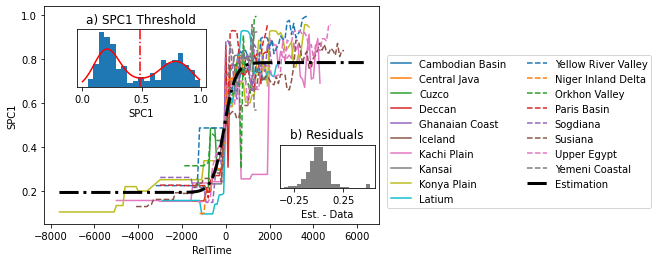

In [76]:
fig, ax1 = plt.subplots()
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.6, 0.3, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

left, bottom, width, height = [0.67, 0.25, 0.22, 0.15]
ax3 = fig.add_axes([left, bottom, width, height])

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.plot(DF["RelTime"],    
             DF["SPC1"],style, label=name)
    
    
    if N == "Latium":
        style = "--"
    #print(N)
    
ax1.plot(x_show*T, y_hat, "-.",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")


ax2.hist(Data["SPC1"], bins = 20, density = True)
x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["SPC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
ax2.plot(x, KDE, c="red")
ax2.axvline(xmin, linestyle="-.",c="red", )
ax2.set_title("a) SPC1 Threshold")
ax2.set_xlabel("SPC1")
ax2.axes.get_yaxis().set_visible(False)


ax3.set_title("b) Residuals")
ax3.hist(y_est_Residuals-y_Residuals,color="grey",bins = 20, density = True)
ax3.set_xlabel("Est. - Data")
ax3.set_xticks(np.arange(-0.25,0.26,0.5))
ax3.axes.get_yaxis().set_visible(False)

plt.savefig("Logistic_Residuals_RelTime.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

## Out-of-Sample prediction

In [31]:
L = len(Data_RT["RelTime"].to_numpy())


In [32]:
def RhoSq(y_hat, y_true):
    y_mean = np.mean(y_true)
    return(1 - sum((y_hat-y_true)**2)/sum((y_mean-y_true)**2)  )

In [33]:
X1, y1 = Data_RT["RelTime"].to_numpy(), Data_RT["SPC1"].to_numpy()
T = 5000
X1 = np.array(list(X1)) # for some reason, this transformation is necessary
X1 = X1/T # normalisation of the data

for i in range(5):
    
    Selection = np.random.choice(np.arange(L), size = int(L/2), replace = False)
    
    X_train = X1[Selection]
    y_train = y1[Selection]
    
    test_indx = np.ones(len(X1), bool)
    test_indx[Selection]=0
    y_test = y1[test_indx]
    X_test = X1[test_indx]
    
    (a1_, b1_, c1_, d1_), _ = opt.curve_fit(f, X_train, y_train)
    print((a1_, b1_, c1_, d1_))
    print(RhoSq( f(X_test, a1_, b1_, c1_, d1_), y_test))
    

(0.5760881682769662, 0.2069917224022347, 25.66083219301476, -0.008584105790877422)
0.83755013983085
(0.5744267652186671, 0.19597794772044785, 24.182563814091907, -0.019812601840733173)
0.8488741911806463
(0.5773686476930401, 0.20495424523672734, 23.269950334481752, -0.01565809415012772)
0.8466270478052509
(0.5855122081606539, 0.19037192538113426, 21.76444712961275, -0.017015974422228426)
0.8519244844362515
(0.6106684179164272, 0.18127492685265129, 15.340956583204296, -0.0160183906167653)
0.8320431061827471


In [34]:
opt.curve_fit(f, X_train, y_train)[0]

array([ 0.61066842,  0.18127493, 15.34095658, -0.01601839])

#### Bootstrapping

Will lead to some uncertainty values for our parameters. Hence, we might want to throw away some of them as a possible zero-value (prime candidate for this is the parameter d). The bootstrapped uncertainty for c will tell us more about the range of possible time scales for the temporal evolution and, by judging the width of this uncertainty, if there is a universal time scale.

In [35]:
Data_Reduced = Data_RT[["NGA", "RelTime", "SPC1"]]
NGA_red = list(set(Data_RT["NGA"]))


In [36]:
import random
random.seed(1234)
nBT = 1000 # how many Bootstraps
negCcount = 0

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    if c_ < 0:
        print(NGA_selection)
        negCcount +=1
        for N in NGA_selection:
            DF = Data_RT[Data_RT["NGA"] == N]
            plt.plot(DF["RelTime"]/T,    # ALSO normalised
            DF["SPC1"], label=N)
            plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # FOR FULL DATA
            plt.plot(x_show, f(x_show, a_, b_, c_, d_), "-.",c="r", linewidth = 3)

        plt.show()
        
    print(a_, b_, c_, d_)
    print("-----------------")
print(Params.round(2))

0.6165033899250641 0.19214652979967728 13.349669744443494 -0.013094801514833124
-----------------
0.6785559087190772 0.16201242778345604 8.895399057238402 -0.0034810725833799125
-----------------
0.5799062419545883 0.20233703477796658 32.97985584537397 -0.013434558688394044
-----------------
0.520233956808628 0.20762881975122574 42.061438796125096 -0.01735250608385034
-----------------
0.6121385268218005 0.18583434107092547 14.58454340955195 -0.013746254264580173
-----------------
0.6008830880388781 0.2012258133228086 15.261638826004324 -0.011713966487732387
-----------------
0.566410236230794 0.19387308739554768 34.52482680323094 -0.010656338437497397
-----------------
0.5840020741048445 0.19828343754326838 24.79682421799523 -0.014804575307222081
-----------------
0.5265258472822206 0.22109360887725077 50.43608659361968 -0.015539036479007782
-----------------
0.5745094492206492 0.19470437436899254 29.843586523368643 -0.0149756803089676
-----------------
0.6618111767298194 0.1685475562

0.5726773242583264 0.19058887424094828 33.1140404166553 -0.007636121708020252
-----------------
0.5175299156660368 0.20886283649917364 48.150810976159555 -0.018738743226659176
-----------------
0.5902290609644385 0.19270765323151745 26.34255451180616 -0.008743582513392488
-----------------
0.5921913942028659 0.20776056512947735 26.083289942746543 -0.01885273606495226
-----------------
0.6163163067331062 0.1865004828046181 12.830735322087387 -0.017417318013871547
-----------------
0.6430117964613314 0.16902991582392202 9.971425517500878 -0.006541898909945365
-----------------
0.5922895353662171 0.1862459330380963 14.548639114865654 -0.014017493912815175
-----------------
0.6293081895580571 0.16252677041032532 11.934674297795276 -0.02164617127491788
-----------------
0.5564288270564701 0.19470273071019228 27.342948775375334 -0.01233696871938436
-----------------
0.6467984224402896 0.1946909519405301 14.297086281367266 -0.007763879552733864
-----------------
0.5689928856558885 0.195126789

0.6051684206404883 0.19581434249258056 21.101130906525594 -0.013544037753788134
-----------------
0.6153925444688575 0.17696429802239133 16.26454008568292 -0.015801552287077376
-----------------
0.6217664991387502 0.1664925233814234 15.694826703808866 -0.010582257059418065
-----------------
0.5809379718111631 0.20288688549065476 34.70696622760013 -0.018313534017743837
-----------------
0.6418659885629647 0.18004784853347167 14.9959114424968 -0.005387108866845858
-----------------
0.6061302945873809 0.1753025787054402 12.705184514979502 -0.02765210336864834
-----------------
0.5062698518790044 0.2244812910506108 41.71079276508454 -0.018654670750537432
-----------------
0.6555297074595897 0.18993228553865632 11.97071108881293 -0.010840992887938418
-----------------
0.5730326902655324 0.20632090952973156 24.177351360874408 -0.015087409597813602
-----------------
0.6084339505815783 0.19696102595988035 19.657518495713145 -0.012723457701715101
-----------------
0.6275849058879731 0.167344912

0.6104653030907752 0.17789500611468267 13.414700783797773 -0.011740129573107017
-----------------
0.6722096498117123 0.17598033035618765 9.218507451458029 -0.0029317822241511854
-----------------
0.653202428503025 0.1625192577897052 11.446692984919887 -0.0070988178520393274
-----------------
0.5539990332076393 0.2021499350290054 20.777432632470443 -0.023821461018037324
-----------------
0.619001471451148 0.1947095782914166 13.10179876227198 -0.01402348752657007
-----------------
0.6526566928856906 0.15066616571623367 6.35954591334164 -0.008822628679866976
-----------------
0.6188689224664222 0.17306751784480545 26.99050173803014 -0.009878478049105105
-----------------
0.5780198654920456 0.19711479917885208 21.41972753514322 -0.014961044893357422
-----------------
0.6466654001606253 0.1681578627925646 8.589153697571785 -0.014462661635427795
-----------------
0.6543172772835913 0.17924876959973918 13.25767009074556 -0.009684421640147987
-----------------
0.6145947955680593 0.206196481919

0.6076338455459488 0.21674769179976877 16.736715029924614 -0.009818555039277059
-----------------
0.5369088945859957 0.21985827195391472 37.13074906329391 -0.017535989488270103
-----------------
0.5767115088729635 0.22068719522464023 30.114349131888787 -0.013142824348634254
-----------------
0.5827582329715453 0.1926519996467344 18.581061049365356 -0.018177102359278004
-----------------
0.6005481624479452 0.2181610593163393 16.476568835481235 -0.006833581667555152
-----------------
0.5897063506189049 0.19144538344928602 20.681152858480242 -0.010063626265856418
-----------------
0.5875001828615907 0.22168769819343506 18.94270187764302 -0.013805864756108482
-----------------
0.6069602653344258 0.21370725739662186 26.161254247886642 -0.008495975210516309
-----------------
0.647672753889555 0.1819102512636825 10.891006046862135 -0.022054350816203605
-----------------
0.6087987288938026 0.2114379692375299 17.263375887572696 -0.011491358039229576
-----------------
0.5779565670585436 0.200389

0.6254688774948031 0.19000846484856931 15.97143999289575 -0.0174276202801949
-----------------
0.5523108070788263 0.21846425909049322 40.91266569280177 -0.01718972034415683
-----------------
0.7188766501845945 0.14804301510155096 6.016454392373113 -0.011035039893512967
-----------------
0.6087545938765127 0.18647605865739958 17.1995445104993 -0.009937920304590963
-----------------
0.6582009460986814 0.18755456337451096 11.944739473095462 -0.006675658618962585
-----------------
0.5522353922402243 0.19376098381958845 40.9432362508444 -0.016073661415875524
-----------------
0.5006435653177833 0.20373202590117642 112.88651222643178 -0.013685129675152495
-----------------
0.5967698706392641 0.18925508485578904 19.028827037413755 -0.010744883165805238
-----------------
0.6319788441896167 0.17154347914256005 9.404263713468533 -0.012211624670942571
-----------------
0.6758001520522517 0.15096678582469797 7.284639737122069 0.00772755296462339
-----------------
0.5282479928983785 0.1825520392195

0.6018659263856927 0.18041519905044473 15.95432826563346 -0.012243761160185229
-----------------
0.5829888560084655 0.1973502670205689 25.41897200001415 -0.014084564207591074
-----------------
0.7257230532607745 0.16190279688682968 7.41795690539313 0.002387404623130954
-----------------
0.6110667530129462 0.2021448713864793 14.790867300990621 -0.012847786806161849
-----------------
0.5533513126675828 0.19392136262816453 48.42814433885464 -0.015129647267392719
-----------------
0.5779544559780416 0.19792048303550552 35.07831303746145 -0.00792337866141934
-----------------
0.6015736527905655 0.19192589419019648 13.16784832606093 -0.03134492585217347
-----------------
0.5340467406938905 0.2009516248594238 32.692621477058914 -0.02477397432184126
-----------------
0.6647344638121452 0.1424614705202205 6.912835127267733 -0.010721448128560596
-----------------
0.5973600155370243 0.1857244417423454 16.722745130284203 -0.01563354427516798
-----------------
0.649164447740832 0.17123923003181155 

0.5737752861967588 0.1818205017997053 26.99513765695841 -0.01834242957568181
-----------------
0.6631651282997739 0.17129418493142487 9.80095626606753 -0.006995061365556952
-----------------
0.5862686426882967 0.18507486578952834 24.377531996026296 -0.01031627856634254
-----------------
0.5885452608985159 0.20422497482432672 24.05782993801534 -0.01495452060154656
-----------------
0.6450724285829825 0.18219376647805652 10.60633597867763 -0.01073077828449137
-----------------
0.538403743171928 0.19486927923342204 43.5578954706885 -0.01320942672367299
-----------------
0.5922205129104869 0.2164184651081378 20.94835270707192 -0.011033725804842694
-----------------
0.6519644755168077 0.171396829416378 10.126985601344249 -0.017582119316604847
-----------------
0.6007822260952471 0.19598032302483692 20.111691965944498 -0.012275673596166383
-----------------
0.6033284911134376 0.18799391863949386 22.59954387722721 -0.01703313652116998
-----------------
0.5501452345772795 0.1942318726767965 27

0.6515288576248264 0.2193742028972152 10.781547025559343 0.0037941450635351963
-----------------
0.5981712961753736 0.17925273750360807 14.534311153229842 -0.01828134186289684
-----------------
0.5366945304956512 0.20454084679278256 28.786090298077646 -0.019483856688474105
-----------------
0.6416490694952496 0.18296019698121258 16.07363732437551 -0.010755766157157459
-----------------
0.5515045348198114 0.2084838090674618 33.51301978097995 -0.01795603069509956
-----------------
0.5833884539252485 0.20389387096739414 30.912360956982624 -0.01626666906118542
-----------------
0.5325029613903066 0.26484360247954847 29.19267425664274 -0.006808521285630098
-----------------
0.5859038186146223 0.20528656164947645 34.272508760551545 -0.010359367347737899
-----------------
0.6837212657742204 0.15708431327891315 7.644930866112076 -0.007731034530203859
-----------------
0.6132674207497754 0.16625820935155972 17.037077748031876 -0.011582212324394313
-----------------
0.6208563820007 0.18396546352

0.5797775086605939 0.18325406036388178 17.72555407148183 -0.01936087877478465
-----------------
0.5837157567265077 0.20463049846461076 20.965366329990548 -0.021761409823969284
-----------------
0.6411074958702858 0.19121404709798692 9.612004266178156 -0.00577466949290063
-----------------
0.6330667640462481 0.17039089180442094 15.861391010713946 -0.010675986760208192
-----------------
0.5717819044867347 0.19888917173445025 32.25460569539188 -0.011023907742386074
-----------------
0.5746111196883815 0.23587634370114474 23.71186797302486 -0.014215748922915833
-----------------
0.5822789167107937 0.19267002721598278 28.10870823907255 -0.014680624696996492
-----------------
0.6563525904965629 0.18159528836166472 11.630673326020784 -0.01601507432564333
-----------------
0.511761640488917 0.20986212493525 43.434036571019014 -0.014642664009100867
-----------------
0.5882480305257205 0.2006362793970235 24.392601049389583 -0.01748846885249783
-----------------
0.6386301014002416 0.1723649760596

0.5963031467818529 0.18912583958332693 19.706616191566066 -0.015529314841736029
-----------------
0.565162342697291 0.19321912016689258 35.12433757003388 -0.01564425627303089
-----------------
0.6580080091530109 0.17626815141307098 10.081874796987824 -0.006872675421577491
-----------------
0.6696571126357326 0.18360474723709377 11.560357818855326 -0.012718364463688259
-----------------
0.5844422316193428 0.1880842945366028 18.674100805634705 -0.01921802368610011
-----------------
0.601368247837494 0.18179624072050377 17.309550107050924 -0.016535348160488388
-----------------
0.6216912766933091 0.18903901836273332 17.105437306236503 -0.009056366589523362
-----------------
0.5802743679309855 0.19920876154420872 14.12430995242738 -0.030098891928463423
-----------------
0.5792821180911615 0.196949326590936 37.973985577025225 -0.010126561163546313
-----------------
0.6070619861296523 0.2040181184164646 14.460424690245132 -0.0200630194374278
-----------------
0.6050482066222306 0.20112777835

0.5803542737938516 0.20533959452107653 21.76719522522778 -0.00998728607513342
-----------------
0.5605615741757336 0.19281066356620175 26.853405789536044 -0.01479491462038279
-----------------
0.5822096992610536 0.19262596549211225 20.599150839074365 -0.007595924481226502
-----------------
0.5919540888892517 0.19324764364655644 24.4049256188545 -0.016346253397764406
-----------------
0.5313397777981418 0.21306154356444504 35.498452749481146 -0.016490796106592837
-----------------
0.6002048985237491 0.17754924965489766 15.552022130606497 -0.008325342383422767
-----------------
0.6094691289737109 0.2072126989170941 19.026171184484202 -0.007867843077851575
-----------------
0.6738367409330437 0.19029315379204084 9.49115143553186 -0.010237847024662423
-----------------
0.6047862142107328 0.19817881436943272 14.969604428773154 -0.015207681078231073
-----------------
0.5660755772690459 0.2085984873831186 29.800967509101888 -0.012841366057344221
-----------------
0.5966857749414404 0.19304041

Original estimates:
    
0.59  0.19  19.37  -0.01 

a / (1. + np.exp(-c * (x - d))) + b

In [37]:
print(negCcount)

0


In [38]:
Params.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

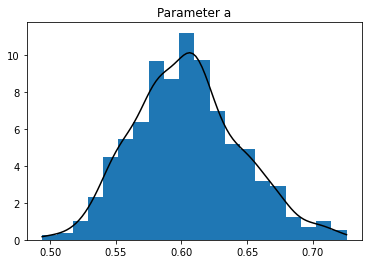

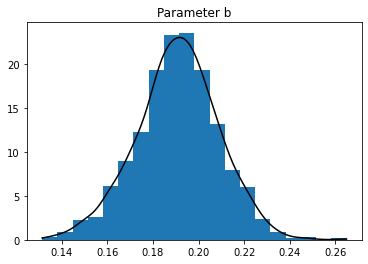

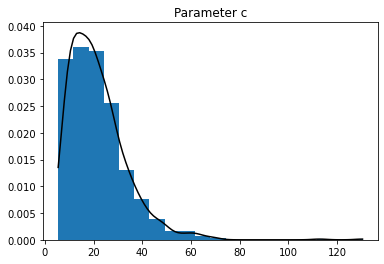

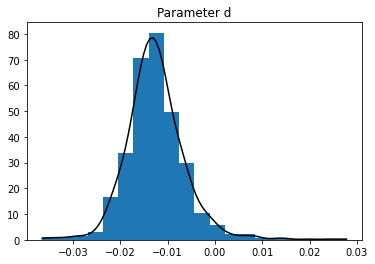

In [39]:
for P in Params.columns:
    
    
    Ps = Params[P]
    P_range = np.linspace(min(Ps), max(Ps),100)
    KDE = gaussian_kde(Ps)(P_range)
    
    plt.hist(Ps,bins=20, density= True)
    plt.plot(P_range, KDE, c="k")
    plt.title("Parameter "+str(P))
    plt.show()

Negative values for c are prevented by setting an initial parameter guess. Otherwise, one can have results with negative C<0 and also A<0 (A, B, C, D) instead of (a,b,c,d) with c>0. Then, via asymptotic behaviour at +/- infinity:

a + b = B
b = A + B

which implies

a = -A

### Analysis of the Curve

When does f(x) = y_est actually change? 
f(-infinity) = b and f(infinity) = a + b. We can now calculate the standard deviations of b and a+b via the bootstrap estimations and check when y_est exceeds b + sd(b) and reaches a+b - sd(a+b).

In [40]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))

Thresh1 = np.mean(Params["b"]) + np.std(Params["b"])
Thresh2 = np.mean(Params["b"]+Params["a"]) - np.std(Params["b"]+Params["a"])
print(Thresh1, Thresh2)
print(min(y_est), max(y_est))

0.19076362617049633 0.0180359693715346
0.7951126422627961 0.031363698707315014
0.20879959554203092 0.7637489435554811
0.19378486713893792 0.7854258798620711


In [41]:
def f1(x):
    # first threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh1)

T1 = opt.root(f1, -0.5)

In [42]:
def f2(x):
    # second threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh2)

T2 = opt.root(f2, 0.5)

C:\Users\Tobias\AppData\Local\Temp/ipykernel_1504/465986300.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


In [43]:
Timeframe = (T2["x"] -T1["x"])[0]
t_2, t_1 = T2["x"], T1["x"]
# scale this back to original time
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*Timeframe), "years.")

Most of the cultural evolution takes place in a time interval of  1785.0 years.


In [44]:
# 1748
# 1804

## Bootstrapping the Time Interval

Now we can repeat this task, but 

1) check if we actually need the parameter d

2) Calculate the time thresholds T1/T2 for every single Bootstrapped Data and therefore calculate a time interval with standard deviation

##### Testing d

In [45]:
print(np.quantile(Params["d"],0.975))


0.0004369884803886316


In [46]:
from statsmodels.stats.weightstats import ztest

ztest(Params["d"], x2=None, value=0, alternative="smaller")
# almost surely not 0, so we keep d

(-62.92748572960881, 0.0)

##### Bootstrap for the Time Interval

In [47]:
def fBT1(x):
    # first threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh1)

def fBT2(x):
    # second threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh2)


In [48]:
random.seed(1234)
nBT = 1000 # how many Bootstraps
Successes = 0

Params2 = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    
    # Select the random NGAs
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection: # combine them to a data frame
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0
    
    # Time Intervals
    T1 = opt.root(fBT1, t_1)
    T2 = opt.root(fBT2, t_2)
    
    # only add results, if opt.root is successful:
    if T1["success"] and T2["success"]:
        Successes += 1
        Params2 = pd.concat([Params2,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_], "T1":T1["x"], "T2":T2["x"]})])    
        print(a_, b_, c_, d_, T1, T2)
        print("-----------------")


0.6165033899250641 0.19214652979967728 13.349669744443494 -0.013094801514833124     fjac: array([[-1.]])
     fun: array([1.0269563e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.50329388e-10])
       r: array([-0.21630923])
  status: 1
 success: True
       x: array([-0.28157229])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.65787392e-13])
       r: array([-0.55575698])
  status: 1
 success: True
       x: array([0.17747052])
-----------------
0.6785559087190772 0.16201242778345604 8.895399057238402 -0.0034810725833799125     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-8.17235168e-13])
       r: array([-0.38749379])
  status: 1
 success: True
       x: array([-0.29609464])     fjac: array([[-1.]])
     fun: array([-2.33146835e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.62149319e-10])
       r: arra

0.6942314228354112 0.1611992628020603 7.430276559542844 -0.005133216717536129     fjac: array([[-1.]])
     fun: array([4.99600361e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.47031332e-10])
       r: array([-0.32943424])
  status: 1
 success: True
       x: array([-0.35625557])     fjac: array([[-1.]])
     fun: array([-2.44249065e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.96187869e-10])
       r: array([-0.59126004])
  status: 1
 success: True
       x: array([0.24826877])
-----------------
0.642882579031656 0.16032125564775132 9.503132698623038 0.005744445659488587     fjac: array([[-1.]])
     fun: array([1.66533454e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-6.77839451e-11])
       r: array([-0.42595697])
  status: 1
 success: True
       x: array([-0.25800464])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([3.40838469e-14])
     

0.6094141894057062 0.17806329147951105 12.80132073449985 -0.013720269536214238     fjac: array([[-1.]])
     fun: array([2.22044605e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-7.13599735e-11])
       r: array([-0.37362169])
  status: 1
 success: True
       x: array([-0.24301704])     fjac: array([[-1.]])
     fun: array([-9.99200722e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.71448855e-10])
       r: array([-0.29193105])
  status: 1
 success: True
       x: array([0.23673082])
-----------------
0.6005582130811236 0.1864313931049583 18.57154632719402 -0.01401102873215485     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.61870517e-13])
       r: array([-0.39993983])
  status: 1
 success: True
       x: array([-0.18913173])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.26876287e-12])
       r: array([-

0.6104341856162298 0.17679384204802095 15.337528097262904 -0.022711518087827322     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-3.45118378e-12])
       r: array([-0.46515144])
  status: 1
 success: True
       x: array([-0.21142505])     fjac: array([[-1.]])
     fun: array([-5.55111512e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.13401399e-10])
       r: array([-0.34626187])
  status: 1
 success: True
       x: array([0.18715531])
-----------------
0.5880227559955494 0.2008870647837663 21.122550434844612 -0.011178850735747523     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.60822483e-15])
       r: array([-0.16488386])
  status: 1
 success: True
       x: array([-0.21450517])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-9.79549775e-12])
       r: array([-0.50872

0.5997197104934672 0.1980940918829996 25.0603742162324 -0.009055354762176074     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.04399545e-11])
       r: array([-0.26349527])
  status: 1
 success: True
       x: array([-0.16897684])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.27675648e-14])
       r: array([-0.80518811])
  status: 1
 success: True
       x: array([0.10306259])
-----------------
0.6507291909888575 0.20169669667356432 10.725507553689223 -0.0025187743142520078     fjac: array([[-1.]])
     fun: array([1.19348975e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.20055715e-10])
       r: array([-0.07535141])
  status: 1
 success: True
       x: array([-0.42269612])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([4.12

0.5894325490760998 0.2049086729345335 28.408292716873643 -0.00751822536465767     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([8.72357742e-14])
       r: array([-0.1098048])
  status: 1
 success: True
       x: array([-0.18401215])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-3.01536573e-13])
       r: array([-0.8239683])
  status: 1
 success: True
       x: array([0.09474473])
-----------------
0.6433721403467347 0.17302556369810035 8.899150220350961 -0.015150698576326536     fjac: array([[-1.]])
     fun: array([2.1649349e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.25290656e-10])
       r: array([-0.30065848])
  status: 1
 success: True
       x: array([-0.33341608])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.68951528e-12])
       r: array([-

C:\Users\Tobias\AppData\Local\Temp/ipykernel_1504/465986300.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


0.6064065976710892 0.20105173045328759 14.129574058455145 -0.015878251280150957     fjac: array([[-1.]])
     fun: array([3.49720253e-15])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.36003023e-10])
       r: array([-0.10807691])
  status: 1
 success: True
       x: array([-0.32355026])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([4.42295089e-11])
       r: array([-0.57307999])
  status: 1
 success: True
       x: array([0.16496081])
-----------------
0.6139502551421557 0.20582557724196482 18.791617063234245 -0.009746513312009842     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.66373598e-15])
       r: array([-0.0556159])
  status: 1
 success: True
       x: array([-0.29312522])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-4.96481745e-11])
       r: a

0.6058436657621468 0.18474767566500774 19.498341264274607 -0.015418916383008784     fjac: array([[-1.]])
     fun: array([-5.88418203e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.96882008e-10])
       r: array([-0.45035973])
  status: 1
 success: True
       x: array([-0.17881219])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-8.77076189e-15])
       r: array([-0.50019333])
  status: 1
 success: True
       x: array([0.14209818])
-----------------
0.6585437419119194 0.15616224815346919 8.11769220073499 -0.017207852923290124     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.63961639e-12])
       r: array([-0.39314035])
  status: 1
 success: True
       x: array([-0.31819236])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([5.29768451e-11])
  

0.5965474568140049 0.2036750244886336 23.63557013457653 -0.015193746664854     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-5.8925087e-14])
       r: array([-0.12008169])
  status: 1
 success: True
       x: array([-0.21609791])     fjac: array([[-1.]])
     fun: array([4.77395901e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([5.07095921e-10])
       r: array([-0.80935717])
  status: 1
 success: True
       x: array([0.10037282])
-----------------
0.5760869793041983 0.20819688271958203 24.348028805737627 -0.0098411413687984     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-4.42687553e-12])
       r: array([-0.01465961])
  status: 1
 success: True
       x: array([-0.29165148])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.01186837e-11])
      

0.6945895155843889 0.18010403308684958 8.938064978420922 -0.008572904517632951     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-7.08100245e-13])
       r: array([-0.24588678])
  status: 1
 success: True
       x: array([-0.3603703])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.36591738e-10])
       r: array([-0.8332414])
  status: 1
 success: True
       x: array([0.17717891])
-----------------
0.572724539918035 0.19612557309352 37.38728115347882 -0.016714685745984306     fjac: array([[-1.]])
     fun: array([-1.30451205e-15])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-1.51566787e-10])
       r: array([-0.46335733])
  status: 1
 success: True
       x: array([-0.1180452])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-4.30211422e-13])
       r: array([

0.706732576659933 0.15234839637188935 6.047990931162434 -0.004520194294290533     fjac: array([[-1.]])
     fun: array([1.44328993e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.04431369e-10])
       r: array([-0.31414673])
  status: 1
 success: True
       x: array([-0.40862606])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.0658141e-13])
       r: array([-0.49879338])
  status: 1
 success: True
       x: array([0.30275316])
-----------------
0.5928003705639676 0.18535611248085063 22.21377631346427 -0.00858683519656154     fjac: array([[-1.]])
     fun: array([-5.55111512e-17])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-2.98343295e-11])
       r: array([-0.50017235])
  status: 1
 success: True
       x: array([-0.15218758])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([4.96047647e-13])
     

0.6188689224664222 0.17306751784480545 26.99050173803014 -0.009878478049105105     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-5.18529664e-13])
       r: array([-0.90874279])
  status: 1
 success: True
       x: array([-0.1133361])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-5.02264896e-13])
       r: array([-0.72614302])
  status: 1
 success: True
       x: array([0.1028426])
-----------------
0.5780198654920456 0.19711479917885208 21.41972753514322 -0.014961044893357422     fjac: array([[-1.]])
     fun: array([-1.38777878e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-4.03417855e-11])
       r: array([-0.24522478])
  status: 1
 success: True
       x: array([-0.19614437])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.50102153e-13])
       r: arra

0.6883125561188685 0.14996309338055067 7.210906121964065 0.013008889713481084     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.87825319e-13])
       r: array([-0.38799867])
  status: 1
 success: True
       x: array([-0.31567731])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([9.84734516e-12])
       r: array([-0.47921803])
  status: 1
 success: True
       x: array([0.30541161])
-----------------
0.5944733617134393 0.20690191667134136 17.570556565722264 -0.010094723288413257     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-3.21964677e-15])
       r: array([-0.03323684])
  status: 1
 success: True
       x: array([-0.33699655])     fjac: array([[-1.]])
     fun: array([4.4408921e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.30489508e-10])
       r: array([-0.6192693]

0.5915647811352213 0.1898266627195629 23.90581518104694 -0.011413029224947092     fjac: array([[-1.]])
     fun: array([-2.60902411e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-2.68071149e-10])
       r: array([-0.43901225])
  status: 1
 success: True
       x: array([-0.15393734])     fjac: array([[-1.]])
     fun: array([1.66533454e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.91087479e-10])
       r: array([-0.40918335])
  status: 1
 success: True
       x: array([0.13424957])
-----------------
0.6707837289312282 0.17569317941542736 10.031925922955931 -0.010801808120854068     fjac: array([[-1.]])
     fun: array([1.66533454e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-6.5983552e-11])
       r: array([-0.31573015])
  status: 1
 success: True
       x: array([-0.30567094])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([6.79456491e-14])
  

0.6208657543761407 0.1858722750400129 17.1953089388419 -0.00573534395324314     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-2.1975588e-11])
       r: array([-0.37968323])
  status: 1
 success: True
       x: array([-0.19538931])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.61958225e-11])
       r: array([-0.68802672])
  status: 1
 success: True
       x: array([0.14537646])
-----------------
0.6102228080592392 0.18878937403086674 14.654718818885392 -0.022023920289334493     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.58904009e-13])
       r: array([-0.28362824])
  status: 1
 success: True
       x: array([-0.25295565])     fjac: array([[-1.]])
     fun: array([-3.44169138e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([4.58753591e-10])
       r: array([-

0.6032597252972095 0.1964629975999999 16.395468339795233 -0.02197423964475257     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.16200938e-11])
       r: array([-0.19812835])
  status: 1
 success: True
       x: array([-0.25796113])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([4.15945056e-12])
       r: array([-0.55463519])
  status: 1
 success: True
       x: array([0.14624744])
-----------------
0.6282019244746264 0.17144655876705717 13.77733899648082 -0.01509608412819408     fjac: array([[-1.]])
     fun: array([8.32667268e-17])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-4.24160429e-11])
       r: array([-0.48402647])
  status: 1
 success: True
       x: array([-0.21550823])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.23404645

0.6155175273407274 0.18810241008786147 17.83034446197078 -0.009461366295985542     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.71215819e-12])
       r: array([-0.35662869])
  status: 1
 success: True
       x: array([-0.19780667])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.73194792e-14])
       r: array([-0.66486318])
  status: 1
 success: True
       x: array([0.14027465])
-----------------
0.6463432704029962 0.15334131175270474 7.1426026971476935 -0.015072493983161296     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.1233986e-11])
       r: array([-0.36212867])
  status: 1
 success: True
       x: array([-0.34632294])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([4.81314988e-12])
       r: array([-0.24240

0.6783205347485457 0.14471279079449975 6.520011104943031 -0.0009441915384934388     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.05663264e-12])
       r: array([-0.37836916])
  status: 1
 success: True
       x: array([-0.34759039])     fjac: array([[-1.]])
     fun: array([-3.44169138e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([5.44010614e-10])
       r: array([-0.35275444])
  status: 1
 success: True
       x: array([0.3588432])
-----------------
0.591720039329842 0.18412916379004762 24.5427434049145 -0.009940433221355361     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([1.40637502e-13])
       r: array([-0.58023591])
  status: 1
 success: True
       x: array([-0.1376703])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.05951914e-11])
       r: array([-0.29090026])

0.6439899153714489 0.17977153816985295 10.631714052609954 -0.01733009065228667     fjac: array([[-1.]])
     fun: array([7.49400542e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.55917834e-10])
       r: array([-0.29470836])
  status: 1
 success: True
       x: array([-0.30451778])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.2678969e-11])
       r: array([-0.57857858])
  status: 1
 success: True
       x: array([0.19668143])
-----------------
0.5776962668302064 0.19816158803986422 19.86675827142334 -0.01448322317620207     fjac: array([[-1.]])
     fun: array([2.24820162e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-2.21571234e-10])
       r: array([-0.20745305])
  status: 1
 success: True
       x: array([-0.21461798])     fjac: array([[-1.]])
     fun: array([-5.55111512e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([8.05323586e-11])
     

0.5875304109456048 0.20649550294413505 20.660069781808083 -0.01640694799734831     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-2.49800181e-15])
       r: array([-0.04741604])
  status: 1
 success: True
       x: array([-0.28442694])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-4.27102798e-13])
       r: array([-0.59328936])
  status: 1
 success: True
       x: array([0.1245719])
-----------------
0.7225715265207813 0.15484543973152534 6.441372523863592 -0.001005126213692543     fjac: array([[-1.]])
     fun: array([1.41553436e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.98468028e-10])
       r: array([-0.32158976])
  status: 1
 success: True
       x: array([-0.39177235])     fjac: array([[-1.]])
     fun: array([-3.33066907e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.5152668e-10])
   

0.6232254530389307 0.17856378020748626 15.03698010858807 -0.013726467959500254     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-3.73390208e-12])
       r: array([-0.4325979])
  status: 1
 success: True
       x: array([-0.21164851])     fjac: array([[-1.]])
     fun: array([-3.21964677e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([4.60235516e-10])
       r: array([-0.53710056])
  status: 1
 success: True
       x: array([0.16804424])
-----------------
0.653409843722485 0.19677533337093064 12.922645762419977 -0.003092272686086507     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.15930052e-12])
       r: array([-0.15252592])
  status: 1
 success: True
       x: array([-0.31082371])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.30272459e-11])
       r: array([-0.9692242

0.5757350256964382 0.20874927964790485 26.084903801654477 -0.016845049886103722     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([-1.11022302e-15])
       r: array([-0.00131237])
  status: 1
 success: True
       x: array([-0.37509803])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([4.54883908e-11])
       r: array([-0.52139826])
  status: 1
 success: True
       x: array([0.1091714])
-----------------
0.6166176718115067 0.20570871558848852 14.382230294435114 -0.013576922386197782     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.33143496e-13])
       r: array([-0.04423093])
  status: 1
 success: True
       x: array([-0.38144533])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([2.48466803e-11])
       r: a

       x: array([-0.31769327])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-2.48358001e-11])
       r: array([-0.67237595])
  status: 1
 success: True
       x: array([0.15141429])
-----------------
0.5779544559780416 0.19792048303550552 35.07831303746145 -0.00792337866141934     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([3.54716256e-14])
       r: array([-0.37443746])
  status: 1
 success: True
       x: array([-0.12063255])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-4.51538806e-12])
       r: array([-0.41643467])
  status: 1
 success: True
       x: array([0.10162976])
-----------------
0.6015736527905655 0.19192589419019648 13.16784832606093 -0.03134492585217347     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: arr

0.6092222706817906 0.19076348498196297 18.505155439438017 -0.008619681888382982     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-4.75214312e-12])
       r: array([-0.32387978])
  status: 1
 success: True
       x: array([-0.19720254])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.19824159e-14])
       r: array([-0.63068217])
  status: 1
 success: True
       x: array([0.14057036])
-----------------
0.6527862298080991 0.18222563717506748 10.763266829553372 -0.011197337622242195     fjac: array([[-1.]])
     fun: array([1.52655666e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.31785313e-10])
       r: array([-0.27438083])
  status: 1
 success: True
       x: array([-0.30476598])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.60316205e-13])
       r: array([-0.68328

0.6528046453710262 0.1824811059950324 10.233362564427253 -0.01020578568289785     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.47937218e-14])
       r: array([-0.25846847])
  status: 1
 success: True
       x: array([-0.31996271])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.02502468e-12])
       r: array([-0.65184011])
  status: 1
 success: True
       x: array([0.19451671])
-----------------
0.5812740140287174 0.1840945636480278 33.613392019159406 -0.014134114559410221     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-7.92108046e-12])
       r: array([-0.79512506])
  status: 1
 success: True
       x: array([-0.10679909])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.44169138e-15])
       r: array([-0.054289

0.6102981348539546 0.19883155344393702 17.235925636939175 -0.016371757176353672     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-7.7846618e-12])
       r: array([-0.16900252])
  status: 1
 success: True
       x: array([-0.2541365])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.83409962e-11])
       r: array([-0.72401859])
  status: 1
 success: True
       x: array([0.12992683])
-----------------
0.6341061603632966 0.19266468144061072 18.917142007430957 -0.008863922519246841     fjac: array([[-1.]])
     fun: array([6.9388939e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([9.29725741e-11])
       r: array([-0.29745773])
  status: 1
 success: True
       x: array([-0.20157043])     fjac: array([[-1.]])
     fun: array([-4.3298698e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-6.3547112e-10])
     

       x: array([0.17093621])
-----------------
0.5954549609176212 0.18924416266032879 27.08145094925991 -0.016383979934943015     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([2.05573891e-11])
       r: array([-0.51219803])
  status: 1
 success: True
       x: array([-0.14129162])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-4.81059637e-13])
       r: array([-0.54739962])
  status: 1
 success: True
       x: array([0.10589016])
-----------------
0.6205825029825405 0.19378347453177988 14.719440370837445 -0.01545227152769469     fjac: array([[-1.]])
     fun: array([5.55111512e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.30971353e-11])
       r: array([-0.21568119])
  status: 1
 success: True
       x: array([-0.26661942])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solutio

0.7079405559989141 0.16120279905185833 7.955125666357355 0.002551402374964604     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.93600691e-11])
       r: array([-0.35318192])
  status: 1
 success: True
       x: array([-0.32805244])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.78426163e-11])
       r: array([-0.71360583])
  status: 1
 success: True
       x: array([0.22171257])
-----------------
0.5882166422713881 0.19667130843346106 18.993876190863226 -0.018323963205288583     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-6.17395024e-13])
       r: array([-0.22561345])
  status: 1
 success: True
       x: array([-0.22158529])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([2.02962092e-11])
       r: array([-0.38708335

0.6205133961312442 0.1627553358321026 11.621512224132323 -0.01320602476284386     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.59650071e-13])
       r: array([-0.49539738])
  status: 1
 success: True
       x: array([-0.23037598])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([5.54012392e-12])
       r: array([-0.21971352])
  status: 1
 success: True
       x: array([0.28169153])
-----------------
0.5785814007505431 0.2018750482966259 36.85017994210939 -0.012854020577414908     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([2.01727524e-13])
       r: array([-0.25211694])
  status: 1
 success: True
       x: array([-0.13262185])     fjac: array([[-1.]])
     fun: array([3.21964677e-15])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([2.97929792e-10])
       r: array(

0.5880391033502238 0.1959696223308571 20.280114207259093 -0.01553209257667834     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([3.11944914e-13])
       r: array([-0.25451629])
  status: 1
 success: True
       x: array([-0.20305321])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([4.95603558e-13])
       r: array([-0.39671486])
  status: 1
 success: True
       x: array([0.14882078])
-----------------
0.6161009301568776 0.18472167350783383 16.137461009530405 -0.007286939924590429     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-3.5305231e-11])
       r: array([-0.3733725])
  status: 1
 success: True
       x: array([-0.20572275])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([3.18504112e-11])
       r: array([-

0.6079591848388535 0.17700897017758183 19.383008634909256 -0.016144755263825143     fjac: array([[-1.]])
     fun: array([1.66533454e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([6.40455744e-11])
       r: array([-0.58397501])
  status: 1
 success: True
       x: array([-0.16561736])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([4.99816855e-11])
       r: array([-0.3969388])
  status: 1
 success: True
       x: array([0.1551225])
-----------------
0.6253564045441519 0.1826616538473208 13.505853209996337 -0.006636910035474509     fjac: array([[-1.]])
     fun: array([8.32667268e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.61019548e-11])
       r: array([-0.33826103])
  status: 1
 success: True
       x: array([-0.23855401])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.6066262

0.5919195053272442 0.19716825145241224 22.830981483500242 -0.013741369010949408     fjac: array([[-1.]])
     fun: array([-3.88578059e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([6.73455181e-11])
       r: array([-0.26033822])
  status: 1
 success: True
       x: array([-0.18499206])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.71295209e-11])
       r: array([-0.55374422])
  status: 1
 success: True
       x: array([0.122358])
-----------------
0.6808122407425093 0.1754051524365599 7.4973326858114016 -0.006435058990771054     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.3619661e-12])
       r: array([-0.23808847])
  status: 1
 success: True
       x: array([-0.401856])     fjac: array([[-1.]])
     fun: array([-5.55111512e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.90021221e-10])
    

0.6746957599373398 0.17185630984709085 10.105846510965199 -0.005482621703605596     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.32736053e-12])
       r: array([-0.3529007])
  status: 1
 success: True
       x: array([-0.28735573])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.66373598e-13])
       r: array([-0.73409863])
  status: 1
 success: True
       x: array([0.18914328])
-----------------
0.581848656561687 0.19297415048126362 26.494691346236266 -0.010157250258181347     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([6.55892007e-13])
       r: array([-0.40788609])
  status: 1
 success: True
       x: array([-0.14516603])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.73373538e-11])
       r: array([-0.287815

0.6330667640462481 0.17039089180442094 15.861391010713946 -0.010675986760208192     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.5984436e-12])
       r: array([-0.57225399])
  status: 1
 success: True
       x: array([-0.18340374])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.2490009e-12])
       r: array([-0.59032948])
  status: 1
 success: True
       x: array([0.1598152])
-----------------
0.5717819044867347 0.19888917173445025 32.25460569539188 -0.011023907742386074     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([1.73194792e-14])
       r: array([-0.31411636])
  status: 1
 success: True
       x: array([-0.1362056])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.45780063e-11])
       r: array([-0.2205685])


0.6020724528838373 0.20766255602475622 24.341958403890093 -0.0133123796300317     fjac: array([[-1.]])
     fun: array([8.32667268e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-4.69356776e-11])
       r: array([-0.02762599])
  status: 1
 success: True
       x: array([-0.27089476])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-4.84057239e-14])
       r: array([-1.03389222])
  status: 1
 success: True
       x: array([0.08908633])
-----------------
0.6247801177960224 0.1943901585240369 23.73176316866693 -0.0043794985730201885     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([8.16013923e-15])
       r: array([-0.33407461])
  status: 1
 success: True
       x: array([-0.16223474])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-9.7355457e-13])
       r: arr

0.6033820019206761 0.1886085815465288 17.00380626149142 -0.01356354831330805     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-6.2633787e-12])
       r: array([-0.33183565])
  status: 1
 success: True
       x: array([-0.21135909])     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([7.57991447e-11])
       r: array([-0.45773988])
  status: 1
 success: True
       x: array([0.1636801])
-----------------
0.6506378300207142 0.18327890597502303 10.960297457539324 -0.005623408218097143     fjac: array([[-1.]])
     fun: array([3.60822483e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-9.71178415e-11])
       r: array([-0.26874385])
  status: 1
 success: True
       x: array([-0.29744483])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([7.00328684e

0.5817866067324262 0.20105330150251627 31.210284130875372 -0.01172434987531758     fjac: array([[-1.]])
     fun: array([-3.60822483e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-5.74439663e-11])
       r: array([-0.23854344])
  status: 1
 success: True
       x: array([-0.1496752])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-3.19599902e-12])
       r: array([-0.57628215])
  status: 1
 success: True
       x: array([0.09668619])
-----------------
0.6446466993473279 0.1852279930867448 11.404310994960719 -0.015750353897352517     fjac: array([[-1.]])
     fun: array([4.96824804e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-4.61480298e-10])
       r: array([-0.25899131])
  status: 1
 success: True
       x: array([-0.3026076])     fjac: array([[-1.]])
     fun: array([-4.3298698e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([6.92034

0.5792821180911615 0.196949326590936 37.973985577025225 -0.010126561163546313     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-1.22460653e-11])
       r: array([-0.4407955])
  status: 1
 success: True
       x: array([-0.11200605])     fjac: array([[-1.]])
     fun: array([-1.55431223e-15])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-1.83498217e-10])
       r: array([-0.46379217])
  status: 1
 success: True
       x: array([0.09035481])
-----------------
0.6070619861296523 0.2040181184164646 14.460424690245132 -0.0200630194374278     fjac: array([[-1.]])
     fun: array([8.32667268e-17])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.75787163e-11])
       r: array([-0.06859787])
  status: 1
 success: True
       x: array([-0.35449122])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-9.593

0.6016870272500404 0.19597719901122893 19.583126188270835 -0.016694466086885573     fjac: array([[-1.]])
     fun: array([8.32667268e-17])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-3.04452297e-11])
       r: array([-0.24575207])
  status: 1
 success: True
       x: array([-0.21211796])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.33226763e-14])
       r: array([-0.62673007])
  status: 1
 success: True
       x: array([0.12719746])
-----------------
0.672302067584865 0.17622266222237018 9.527149833976036 -0.0026298433183005124     fjac: array([[-1.]])
     fun: array([4.99600361e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.23940691e-10])
       r: array([-0.29532747])
  status: 1
 success: True
       x: array([-0.31515082])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.19531077e-12])
       r: arra

0.6443232210600637 0.16605518714814088 11.409904040511728 -0.01697435981867381     fjac: array([[-1.]])
     fun: array([1.94289029e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-7.63117625e-11])
       r: array([-0.45535611])
  status: 1
 success: True
       x: array([-0.24873084])     fjac: array([[-1.]])
     fun: array([-3.44169138e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.64427274e-10])
       r: array([-0.49353797])
  status: 1
 success: True
       x: array([0.20658982])
-----------------
0.572395549778352 0.2025693692737926 24.006782615861606 -0.018166396489145396     fjac: array([[-1.]])
     fun: array([3.13638004e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-1.66370806e-10])
       r: array([-0.14794249])
  status: 1
 success: True
       x: array([-0.20600804])     fjac: array([[-1.]])
     fun: array([2.77555756e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([2.5451119

0.6175149632719009 0.20639800603565456 15.672188572006121 -0.009223279078343492     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-5.62050406e-14])
       r: array([-0.03749179])
  status: 1
 success: True
       x: array([-0.36307786])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-8.53428439e-13])
       r: array([-0.85103582])
  status: 1
 success: True
       x: array([0.13281945])
-----------------
0.589635718144093 0.1887060052072667 25.305675424528737 -0.013320475316589331     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([1.14921961e-12])
       r: array([-0.4911537])
  status: 1
 success: True
       x: array([-0.14548181])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-7.96029909e-14])
       r: ar

0.6238088131253954 0.19790232554962178 22.244567064859865 -0.008959271544252983     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.84587934e-13])
       r: array([-0.23817057])
  status: 1
 success: True
       x: array([-0.19011399])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-9.43689571e-15])
       r: array([-1.16954252])
  status: 1
 success: True
       x: array([0.09347167])
-----------------
0.6754300247821841 0.16029675353431388 7.634252441370018 -0.01945215048113483     fjac: array([[-1.]])
     fun: array([5.55111512e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.5627577e-10])
       r: array([-0.34369398])
  status: 1
 success: True
       x: array([-0.35467921])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([9.4702024e-14])
    

In [49]:
print(Successes)
print(Params2.round(2))

715
       a     b      c     d    T1    T2
0   0.62  0.19  13.35 -0.01 -0.28  0.18
0   0.68  0.16   8.90 -0.00 -0.30  0.23
0   0.58  0.20  32.98 -0.01 -0.15  0.09
0   0.61  0.19  14.58 -0.01 -0.24  0.18
0   0.60  0.20  15.26 -0.01 -0.30  0.16
..   ...   ...    ...   ...   ...   ...
0   0.59  0.19  18.42 -0.03 -0.22  0.16
0   0.67  0.15   7.39 -0.01 -0.33  0.30
0   0.62  0.18  11.57 -0.01 -0.27  0.23
0   0.63  0.17  10.77 -0.01 -0.27  0.25
0   0.62  0.18  15.06 -0.01 -0.21  0.18

[715 rows x 6 columns]


In [50]:
np.mean(Params2["T2"]-Params2["T1"]), np.std(Params2["T2"]-Params2["T1"])

(0.41871033560723314, 0.12566541939805514)

In [51]:
TimeframeBT = Params2["T2"]-Params2["T1"]
np.mean(TimeframeBT)

0.41871033560723314

In [52]:
# times T for the transformation to years
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*np.mean(TimeframeBT)),
      u"\u00B1",np.round(T*np.std(TimeframeBT)), "years.")

Most of the cultural evolution takes place in a time interval of  2094.0 ± 628.0 years.


In [53]:
# 1979 plus/minus 612
# 2116.0 ± 642.0

In [54]:
T2_scaled, T1_scaled = np.mean(Params2["T2"])*T, T*np.mean(Params2["T1"])

T1_start_scaled = T*np.mean(Params2["T1"]) - T*np.std(Params2["T1"])
T2_end_scaled = T*np.mean(Params2["T2"]) + T*np.std(Params2["T2"])

Niger Inland Delta
Orkhon Valley
Paris Basin
Central Java
Ghanaian Coast
Yemeni Coastal Plain
Kachi Plain
Kansai
Konya Plain
Latium
Cambodian Basin
Upper Egypt
Susiana
Deccan
Cuzco
Sogdiana
Middle Yellow River Valley
Iceland


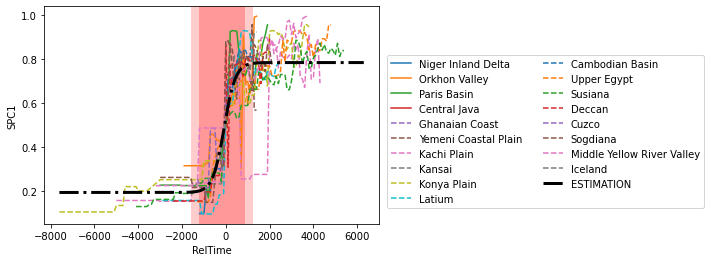

In [70]:
DF_Out = pd.DataFrame(columns=["NGA","RelTime","SPC1"])
DF_CC_Out = pd.DataFrame(columns =["NGA","RelTime","SPC1", "PolPop", "PolTerr",   "CapPop", "levels",
                         "government",  "infrastr", "writing", "texts", "money"])
style = "-"
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],   
             DF["SPC1"],style ,label=N)
    DF_Out = pd.concat((DF_Out, DF[["NGA", "RelTime", "SPC1"]]))
    DF_CC_Out = pd.concat((DF_CC_Out, DF[DF_CC_Out.columns]))
    print(N)
    if N == "Central Java":
        style = "--"
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
plt.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
plt.savefig("SPC1_Time_Interval.pdf",bbox_inches='tight')
plt.show()

In [56]:
list(set(Data_RT["NGA"]))

['Niger Inland Delta',
 'Orkhon Valley',
 'Paris Basin',
 'Central Java',
 'Ghanaian Coast',
 'Yemeni Coastal Plain',
 'Kachi Plain',
 'Kansai',
 'Konya Plain',
 'Latium',
 'Cambodian Basin',
 'Upper Egypt',
 'Susiana',
 'Deccan',
 'Cuzco',
 'Sogdiana',
 'Middle Yellow River Valley',
 'Iceland']

Niger Inland Delta
Orkhon Valley
Paris Basin
Central Java
Ghanaian Coast
Yemeni Coastal Plain
Kachi Plain
Kansai
Konya Plain
Latium
Cambodian Basin
Upper Egypt
Susiana
Deccan
Cuzco
Sogdiana
Middle Yellow River Valley
Iceland


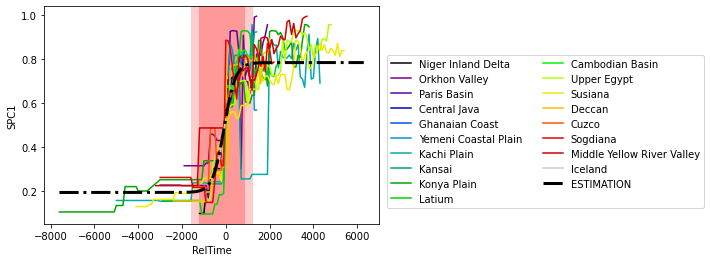

In [57]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
number_of_plots= len(list(set(Data_RT["NGA"])))
colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
ax1.set_prop_cycle('color', [colormap(i) for i in np.linspace(0, 1,number_of_plots)])
for i in range(1,number_of_plots+1):
    N = list(set(Data_RT["NGA"]))[i-1]
    DF = Data_RT[Data_RT["NGA"] == N]
    ax1.plot(DF["RelTime"],   
             DF["SPC1"],label=N)
    DF_Out = pd.concat((DF_Out, DF[["NGA", "RelTime", "SPC1"]]))
    DF_CC_Out = pd.concat((DF_CC_Out, DF[DF_CC_Out.columns]))
    print(N)
    
    
    
    

    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
plt.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
#plt.savefig("SPC1_Time_Interval")
plt.show()

In [58]:
print(T1_start_scaled,T1_scaled, T2_scaled, T2_end_scaled)

-1583.5145574529643 -1205.4807099900374 888.0709680461299 1228.429568561875


In [59]:
DF_Out.index=np.arange(0, DF_Out.shape[0])
DF_Out.to_csv("RelTime_TimeSeries_SPC1.csv")
DF_CC_Out.index = DF_Out.index

In [60]:
Timeframes = np.array([T1_start_scaled,T1_scaled, T2_scaled, T2_end_scaled])

In [61]:
#np.savetxt("Parameters_and_Times.txt",np.concatenate((p0, Timeframes)))

In [62]:
#DF_CC_Out.to_csv("RelTime_TimeSeries_CC.csv")

In [63]:
DF_CC_Out

,NGA,RelTime,SPC1,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money
0,Niger Inland Delta,-1200,0.098110,2.470339,0.732024,2.053112,1.000000,0.090909,0.166667,0.166667,0.0125,0.9
1,Niger Inland Delta,-1100,0.098110,2.470339,0.732024,2.053112,1.000000,0.090909,0.166667,0.166667,0.0125,0.9
2,Niger Inland Delta,-1000,0.098110,2.470339,0.732024,2.053112,1.000000,0.090909,0.166667,0.166667,0.0125,0.9
3,Niger Inland Delta,-900,0.201994,3.377552,2.968441,3.162426,1.548512,0.081818,0.158333,0.166667,0.0125,0.9
4,Niger Inland Delta,-800,0.201994,3.377552,2.968441,3.162426,1.548512,0.081818,0.158333,0.166667,0.0125,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1537,Middle Yellow River Valley,3700,0.996386,8.537934,7.053078,6.043115,8.000000,1.000000,0.925000,0.833333,1.0000,6.0
1538,Iceland,-300,0.337468,4.380242,5.012837,2.399057,2.333333,0.122222,0.000000,0.600000,0.0125,4.0
1539,Iceland,-200,0.404175,4.491362,5.012837,2.399057,2.666667,0.233333,0.000000,0.800000,0.3625,4.0
1540,Iceland,-100,0.473478,4.547767,5.012837,2.399057,2.666667,0.233333,0.000000,1.000000,0.9875,4.0


### Dan's Questions

Do large NGAs reach the SPC1 threshold again after a decline? And are the NGAs that never reach the threshold too young (i.e. did not have enough time to develop)?

In [64]:
Lengths_Small = []
for i in SmallNGAs:
    #print(i)
   # print(Data[Data["NGA"]==i][["NGA", "Time","SPC1"]])
    df_i = Data[Data["NGA"]==i][["NGA", "Time","SPC1"]]
    #print(len(df_i["Time"]))
    Lengths_Small.append(len(df_i["Time"]))
print(" ##################### ")
print("For the low-SPC1 NGAs, the mean length of their time series is",np.mean(Lengths_Small), u"\u00B1",
      np.round(np.std(Lengths_Small),1),"data points and the median is",
     np.median(Lengths_Small), "data points.")

 ##################### 
For the low-SPC1 NGAs, the mean length of their time series is 7.75 ± 9.4 data points and the median is 3.0 data points.


In [65]:
Lengths_Large = []
for i in LargeNGAs:
    #print(i)
   # print(Data[Data["NGA"]==i][["NGA", "Time","SPC1"]])
    df_i = Data[Data["NGA"]==i][["NGA", "Time","SPC1"]]
    #print(len(df_i["Time"]))
    Lengths_Large.append(len(df_i["Time"]))
print(" ##################### ")

print("For the high-SPC1 NGAs, the mean length of their time series is",np.round(np.mean(Lengths_Large),1), u"\u00B1",
      np.round(np.std(Lengths_Large),1),"data points and the median is",
     np.median(Lengths_Large), "data points.")

 ##################### 
For the high-SPC1 NGAs, the mean length of their time series is 42.8 ± 32.4 data points and the median is 38.5 data points.


Indeed, the low-SPC1 NGAs have very short "life times" and their development may simply have been prematurely ended by an outside influence (e.g. conquest).

#### Do they reach SPC1 threshold a second time?

In [66]:
DF_second_time = DF_CC_Out[["NGA", "RelTime", "SPC1"]]
DF_second_time = DF_second_time[DF_second_time["RelTime"]>-1] # look only at data after the first threshold


In [67]:
np.float64(SPC_Break)

0.49

In [68]:
DF_second_time.loc[DF_second_time["SPC1"] < np.float64(SPC_Break)]

,NGA,RelTime,SPC1
47,Orkhon Valley,700,0.302733
188,Kachi Plain,700,0.255631
189,Kachi Plain,800,0.255631
190,Kachi Plain,900,0.255631
191,Kachi Plain,1000,0.255631
192,Kachi Plain,1100,0.255631
193,Kachi Plain,1200,0.276092
194,Kachi Plain,1300,0.276092
195,Kachi Plain,1400,0.276092
196,Kachi Plain,1500,0.276092
